import packages

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import dataset

In [36]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()
X = np.array(iris_dataset['data'][:, :3])   # using only the first 3 columns, denoting the length of the "branch" in the x, y and z axes
y = np.array(iris_dataset['target'])        # each "class" is denoted as different positions of light source

X.shape

(150, 3)

visualisation of made-up data set

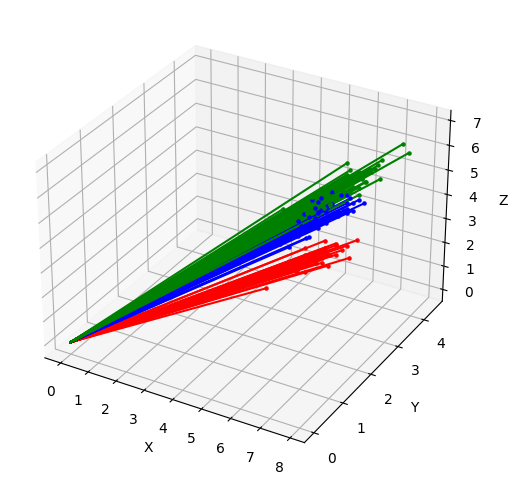

In [37]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')

color = {0:'r', 1:'b', 2:'g'}

for i in range(X.shape[0]):
    ax.scatter(X[i][0], X[i][1], X[i][2], marker='.', c=color[y[i]])

    xline = [0, X[i][0]]
    yline = [0, X[i][1]]
    zline = [0, X[i][2]]
    ax.plot(xline, yline, zline, c=color[y[i]])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

There is total 150 samples in total.
Using 125 samples for training and 25 samples for testing.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    iris_dataset['data'][:, :3], 
                                                    iris_dataset['target'], 
                                                    test_size=25, 
                                                    random_state=0)

convert y into onehot encoding

In [39]:
onehot_encoder = OneHotEncoder(sparse_output=False)
y_train = onehot_encoder.fit_transform(y_train.reshape(-1,1))
y_test = onehot_encoder.fit_transform(y_test.reshape(-1,1))

training for linear regression

In [40]:
poly = PolynomialFeatures(degree=1, include_bias=False) 
P_train = poly.fit_transform(X_train)
P_test = poly.fit_transform(X_test)

if P_train.shape[0] > P_train.shape[1]:                     
    wp = inv(P_train.T @ P_train) @ P_train.T @ y_train                           # overdetermined
else: wp = P_train.T @ inv(P_train @ P_train.T) @ y_train                         # underdetermined

y_est_train = P_train @ wp
y_est_train_class = [[1 if y == max(x) else 0 for y in x] for x in y_est_train]     # determine the class of y_est_train by the position of the max x value

# train accuracy
difference_train = np.abs(np.matrix(y_train) - np.matrix(y_est_train_class))
train_correct = np.where(~difference_train.any(axis=1))[0]

train_acc = len(train_correct) / len(y_train)
train_acc

0.824

testing for linear regression

In [41]:
y_est_test = P_test @ wp
y_est_test_class = [[1 if y == max(x) else 0 for y in x] for x in y_est_test]       # determine the class of y_est_test by the position of the max x value

# test accuracy
difference_test = np.abs(np.matrix(y_test) - np.matrix(y_est_test_class))
test_correct = np.where(~difference_test.any(axis=1))[0]

test_acc = len(test_correct) / len(y_test)
test_acc

0.76

visualisation for prediction of each class

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 100)

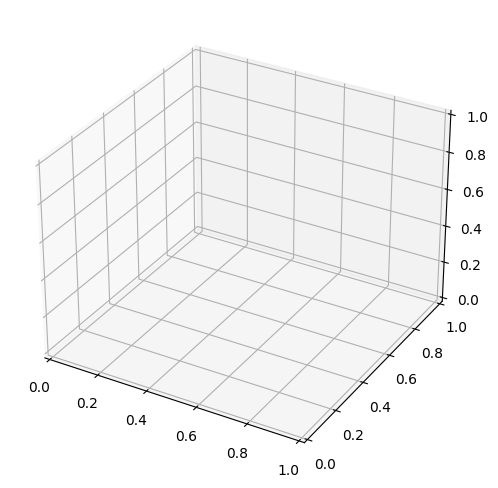

In [42]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')

x_range = np.linspace(0, 9, 100)
y_range = np.linspace(0, 5, 100)
z_range = np.linspace(0, 8, 100)

for i in range(len(wp)):
    ax.plot(x_range@wp[:,0], y_range@wp[:,1], z_range@wp[:,2], c=color[i])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [ ]:
wp
# z_range.shape
# wp.shape

array([[ 0.12043888,  0.318815  , -0.26979743],
       [ 0.21517254, -0.37929936,  0.2316315 ],
       [-0.27321892, -0.10877524,  0.32711081]])